Name - Angad Singh.
Registration No. - 21BPS1420

Assignment 4:

In [213]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [214]:
# Task 1: Load the dataset
df = pd.read_csv ('/content/winequality-red.csv')
df.head ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [215]:
# Task 2: Data preprocessing including visualization
print ("Missing Values:\n")
print (df.isnull().sum())

Missing Values:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [216]:
def remove_outliers_iqr(data):
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    for column in x:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

df = remove_outliers_iqr(df)
df.shape

(1135, 12)

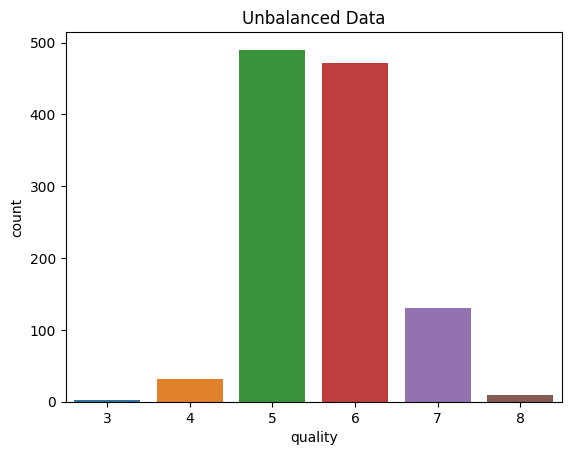

In [217]:
sns.countplot(x='quality',data=df)
plt.title("Unbalanced Data")
plt.show()

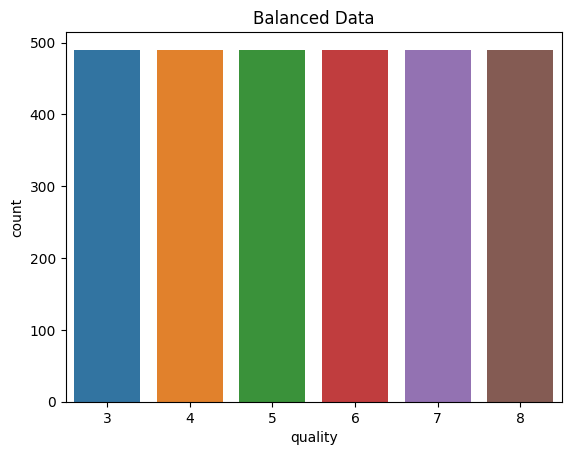

In [218]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
smote = SMOTE(k_neighbors=1,sampling_strategy='auto', random_state=42)
x, y = smote.fit_resample(x, y)
df1= pd.concat([x,y],axis=1)
sns.countplot(x='quality',data=df1)
plt.title("Balanced Data")
plt.show()
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [219]:
# Task 3: Machine Learning Model building
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train.values, y_train)

RandomForestClassifier(random_state=42)

In [220]:
# Task 4: Evaluate the model
y_pred = rf_classifier.predict(x_test.values)
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        83
           4       0.94      1.00      0.97        84
           5       0.75      0.75      0.75       105
           6       0.73      0.65      0.69       117
           7       0.85      0.92      0.88        91
           8       1.00      0.99      1.00       108

    accuracy                           0.87       588
   macro avg       0.88      0.89      0.88       588
weighted avg       0.87      0.87      0.87       588



In [221]:
# Task 5: Test with random observation
print (rf_classifier.predict([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]]))

[5]
